# Connect to Smart Microscope Proxy

In [1]:
%%time
# %matplotlib widget
%matplotlib ipympl

import matplotlib.pylab as plt
import numpy as np

import Pyro5.api
import io
import time

CPU times: total: 266 ms
Wall time: 282 ms


In [2]:
%%time
uri = "PYRO:microscope.server@localhost:9091"
tem_server = Pyro5.api.Proxy(uri)

CPU times: total: 0 ns
Wall time: 0 ns


In [3]:
%%time
#Activate camera
tem_server.activate_device('flu_camera'), tem_server.get_detectors()

CPU times: total: 0 ns
Wall time: 4 ms


AttributeError: remote object 'PYRO:microscope.server@localhost:9091' has no exposed attribute or method 'activate_device'

In [24]:
tem_server.correct_to_2nd_order()

AttributeError: remote object 'PYRO:tem.server@10.46.217.241:9093' has no exposed attribute or method 'correct_to_2nd_order'

In [4]:
column_valve = tem_server.check_status('column valve') 
vacuum_status = tem_server.check_status('vacuum')
print(f' Vacuum: {vacuum_status}\n Column valve: {column_valve}')

 Vacuum: Ready
 Column valve: Closed


In [5]:

tem_server.set_stage({'y': -4e-6})
tem_server.get_stage()

[-1.4584499999998827e-07,
 2.999400000008383e-08,
 -8.760000000028953e-09,
 -3.1360000000182605e-06,
 0]

In [41]:
image, _, _ = tem_server.acquire_image('flu_camera')
plt.figure()
plt.imshow(np.log(image))
plt.colorbar()

AttributeError: 'tuple' object has no attribute 'shape'

C:\Users\gduscher\AppData\Local\Temp\ipykernel_24140\2449339142.py:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(image[0]))


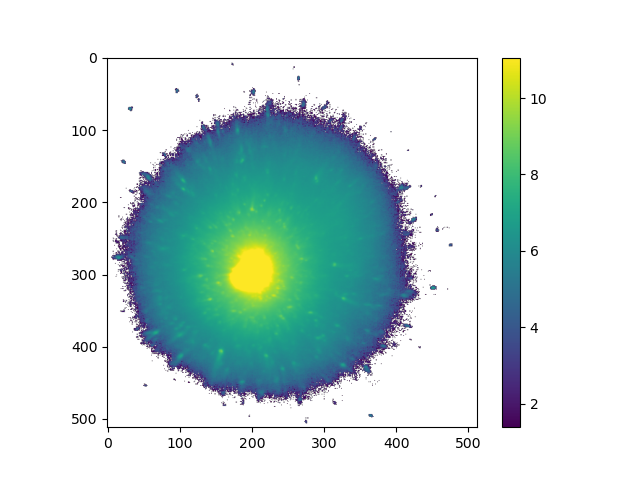

In [4]:
import Pyro5.api

uri = "PYRO:microscope.server@localhost:9091"
proxy = Pyro5.api.Proxy(uri)

proxy.initialize_microscope("dummy")        # or "STEM" if you have an NSID .h5 file
# proxy.register_data("path/to/your_nsid_file.h5")  # only if using a real STEM NSID file

img_list, img_shape, img_dtype = proxy.get_overview_image()  # returns a checkerboard with dummy
print(img_shape, img_dtype)


(128, 128) float64


In [5]:
import Pyro5.api
proxy = Pyro5.api.Proxy("PYRO:microscope.server@localhost:9091")
img_list, img_shape, img_dtype = proxy.get_overview_image(0)
